In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt 
import h5py

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
data = pd.read_csv('A_Z_Handwritten_Data[1].csv')

In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [6]:
data.shape

(372450, 785)

In [7]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [8]:
data.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [9]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [10]:
X = my_data[:,1:]
y = my_data[:,:1]

In [11]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


In [12]:
#X_train.shape (297960, 784)
#(X_test.shape 74490, 784)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [13]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [14]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


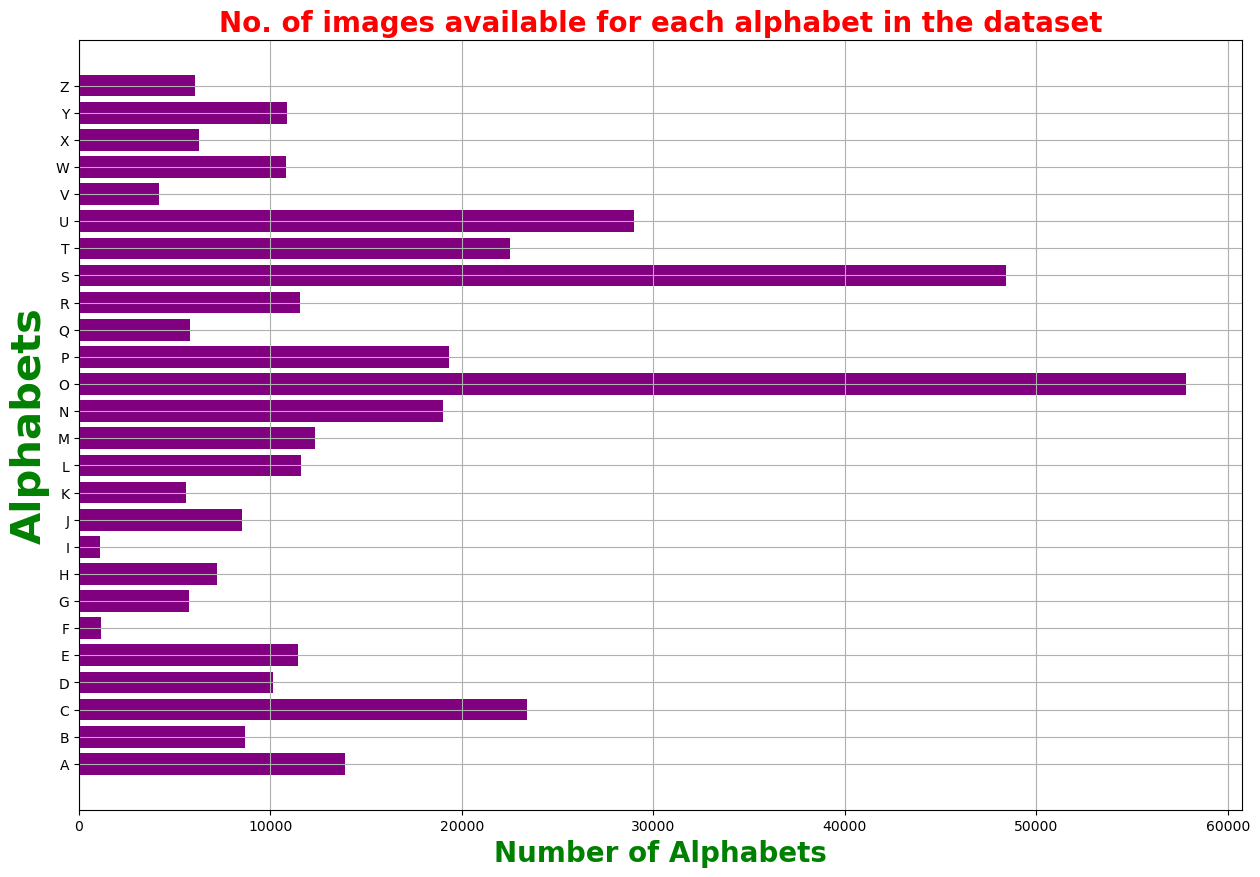

In [15]:
count = np.zeros(26, dtype = 'int') #count list containing all zeroes

#counting each label
for i in y:
    count[i] += 1
# count = array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
#        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
#      48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "purple")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold',color = 'green')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold',color = 'green')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "red")
plt.grid()
plt.show()

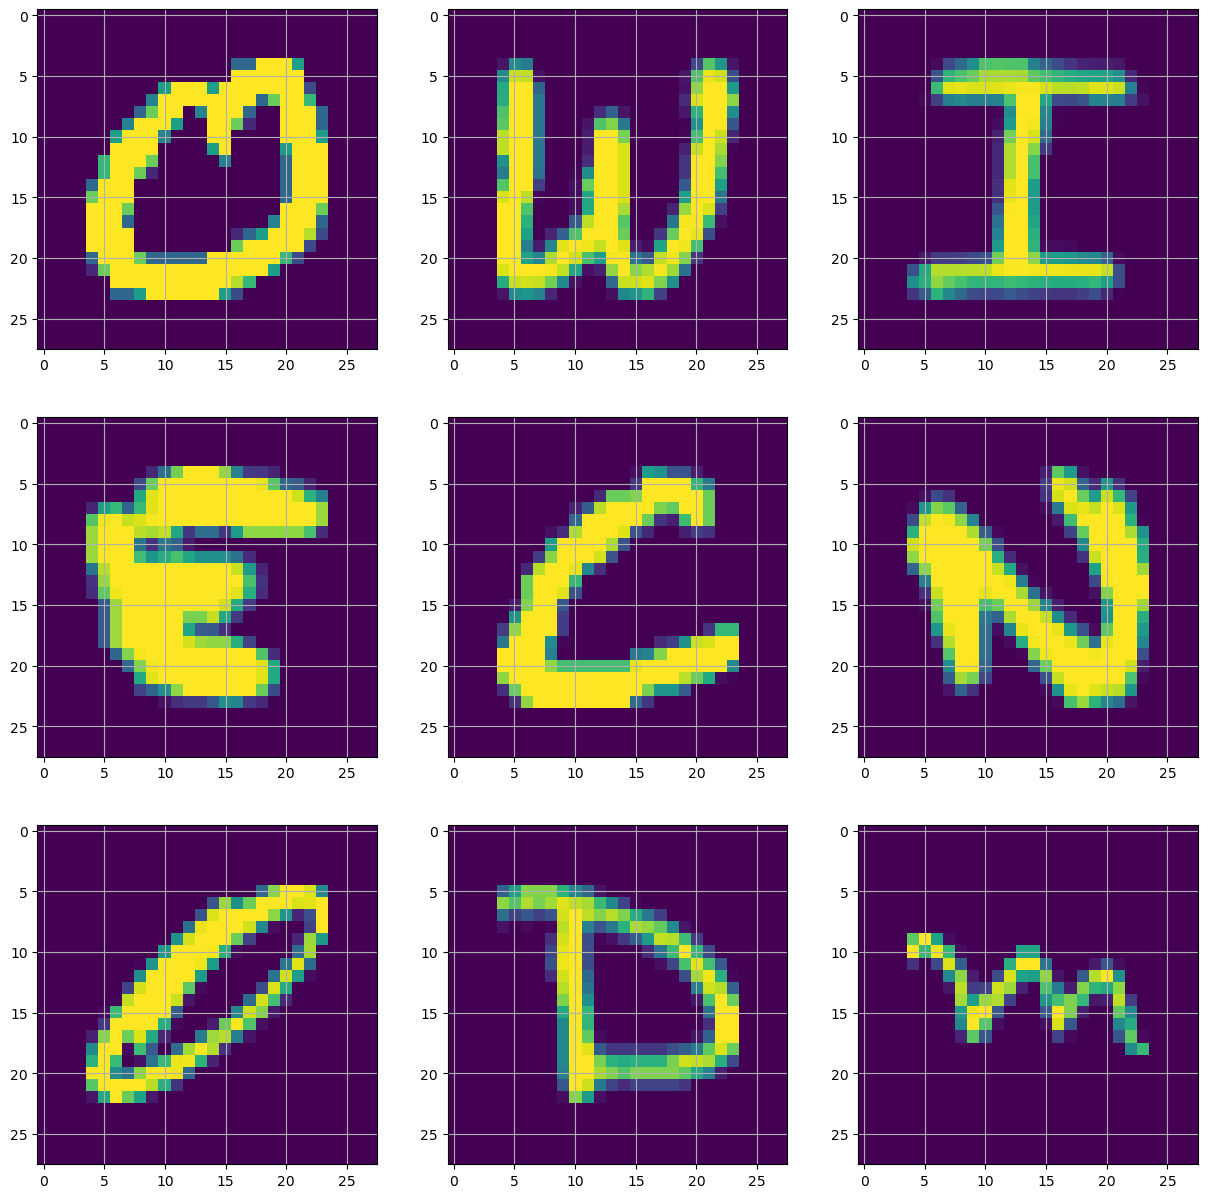

In [16]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

In [17]:
# Now we reshape the train & test image dataset so that they can be put in the model.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [18]:
#downsampling the values
X_train = X_train/255.
X_test = X_test/255.

In [19]:
categorical_ytrain = to_categorical(y_train, num_classes=26)
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes=26)
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [22]:
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define ModelCheckpoint callback to save the best model based on validation accuracy
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define EarlyStopping callback to stop training when the validation loss stops improving
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.001)


In [24]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9310/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9045 - loss: 0.3370
Epoch 1: val_accuracy improved from -inf to 0.98464, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 209s 22ms/step - accuracy: 0.9045 - loss: 0.3369 - val_accuracy: 0.9846 - val_loss: 0.0577
Epoch 2/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9824 - loss: 0.0639
Epoch 2: val_accuracy improved from 0.98464 to 0.98499, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 183s 20ms/step - accuracy: 0.9824 - loss: 0.0639 - val_accuracy: 0.9850 - val_loss: 0.0538
Epoch 3/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9871 - loss: 0.0465
Epoch 3: val_accuracy improved from 0.98499 to 0.98956, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 185s 20ms/step - accuracy: 0.9871 - loss: 0.0465 - val_accuracy: 0.9896 - val_loss: 0.0415
Epoch 4/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9893 - loss: 0.0383
Epoch 4: v

In [25]:
#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9925 - loss: 0.0362


[0.03541921079158783, 0.9927372932434082]

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

In [27]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9927372932434082
The training accuracy is : 0.994502604007721
The validation loss is : 0.03541921079158783
The training loss is : 0.01977219060063362


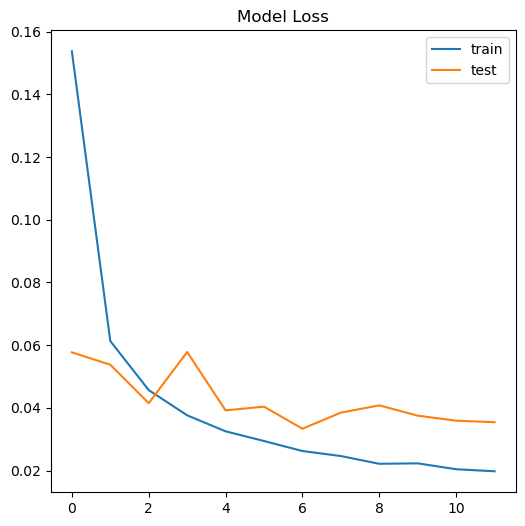

In [28]:
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

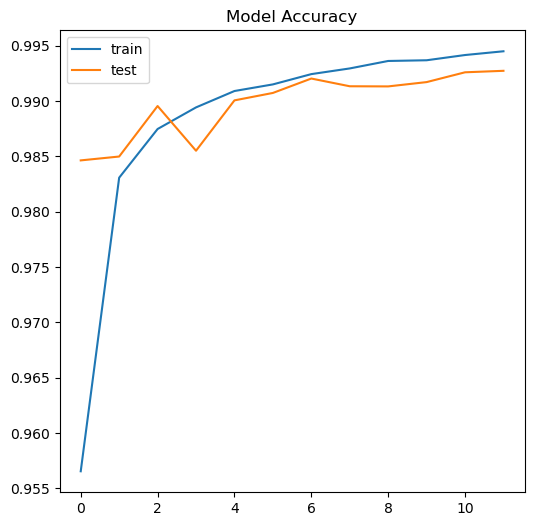

In [29]:
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()